In [217]:
import pandas as pd
import ta
df1 = pd.read_csv('MSFT.csv')
df1_name = 'msft'
df1.index = df1['Date']
df1 = df1.drop('Date', axis=1)
new_col = []
for col in df1.columns:
    new_col.append(col + '_' + df1_name)
df1.columns = new_col
df1.head()
df1['RSI_msft']=ta.momentum.RSIIndicator(df1['Close_msft'],window=20,fillna=False).rsi()

In [218]:
import pandas as pd

df2 = pd.read_csv('GOOG.csv')
df2_name = 'goog'
df2.index = df2['Date']
df2 = df2.drop('Date', axis=1)
new_col = []
for col in df2.columns:
    new_col.append(col + '_' + df2_name)
df2.columns = new_col
df2.head()


,Open_goog,High_goog,Low_goog,Close_goog,Volume_goog
Date,,,,,
2004-08-19,2.490664,2.591785,2.390042,2.499133,897427216
2004-08-20,2.515820,2.716817,2.503118,2.697639,458857488
2004-08-23,2.758411,2.826406,2.716070,2.724787,366857939
2004-08-24,2.770615,2.779581,2.579581,2.611960,306396159
2004-08-25,2.614201,2.689918,2.587302,2.640104,184645512


In [219]:
merged_df = pd.concat([df1, df2],axis=1,join = 'inner').sort_values('Date')

In [220]:
merged_df

,Open_msft,High_msft,Low_msft,Close_msft,Volume_msft,RSI_msft,Open_goog,High_goog,Low_goog,Close_goog,Volume_goog
Date,,,,,,,,,,,
2004-08-19,17.105963,17.168508,16.893311,16.962111,46293000,45.198348,2.490664,2.591785,2.390042,2.499133,897427216
2004-08-20,16.968356,17.118464,16.912067,17.012138,46494800,46.027193,2.515820,2.716817,2.503118,2.697639,458857488
2004-08-23,17.106233,17.143870,17.012140,17.087414,39572200,47.289867,2.758411,2.826406,2.716070,2.724787,366857939
2004-08-24,17.187780,17.225417,16.993320,17.087414,40835300,47.289867,2.770615,2.779581,2.579581,2.611960,306396159
2004-08-25,17.068593,17.357147,17.049775,17.281872,53512700,50.598025,2.614201,2.689918,2.587302,2.640104,184645512
...,...,...,...,...,...,...,...,...,...,...,...
2023-12-04,369.100006,369.519989,362.899994,369.140015,32063300,57.697268,131.294006,131.449997,129.399994,130.630005,24117100
2023-12-05,366.450012,373.079987,365.619995,372.519989,23065000,59.560385,130.369995,133.539993,129.729996,132.389999,19235100
2023-12-06,373.540009,374.179993,368.029999,368.799988,21182100,56.668890,132.899994,133.309998,131.309998,131.429993,16360600


In [221]:
# df = df.join([df1], how ='inner')
# df

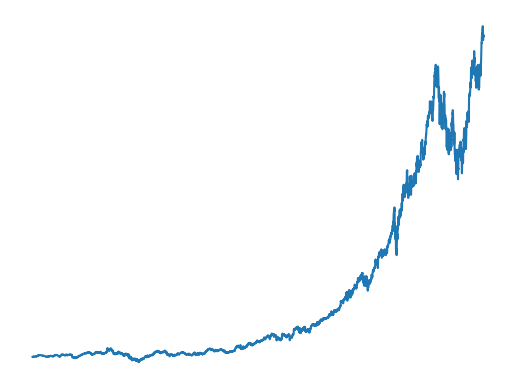

In [222]:
import matplotlib.pyplot as plt

x = merged_df.index
y = merged_df['Low_msft']

plt.plot(x, y)
plt.axis('off')
# plt.xticks(x, x, rotation='vertical')
plt.show()

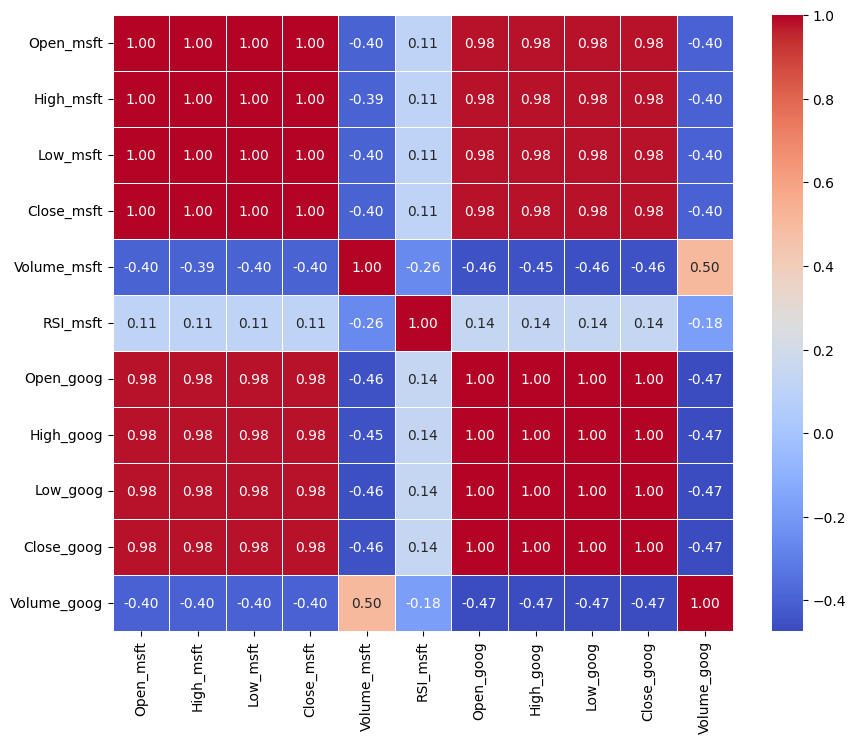

In [223]:
import seaborn as sns
correlation_matrix = merged_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.show()

From this heatmap, we can choose manually feature with high correlation to 'Low' for training

In [224]:
train_test_split = int(len(merged_df)*0.8)
df_train = merged_df[:train_test_split]
df_test = merged_df[train_test_split:]
df_train.shape, df_test.shape

((3888, 11), (973, 11))

# Tune Cell

In [225]:
feature_col = [] # Columns feature for training
for col in merged_df.columns:
    if not (col.startswith('Volume') or col.startswith('Low')or col.startswith('High')or col.startswith('Open')):
        feature_col.append(col)
feature_col

['Close_msft', 'RSI_msft', 'Close_goog']

In [226]:
lamda = 0.5 # Ridge parameter
K_fold = 5 # K fold for cross validation

# Ridge without cross valid

![](/Applications/codingforlife/semester5/Intro2BA/project/Ridge.png)

In [227]:
from sklearn.linear_model import Ridge
y_train = df_train['Close_msft'][:-1].to_numpy()
X_train = df_train[feature_col][1:].to_numpy()
X_train.shape, y_train.shape

((3887, 3), (3887,))

In [228]:
X_train

array([[ 17.01213837,  46.02719301,   2.69763899],
       [ 17.08741379,  47.28986748,   2.724787  ],
       [ 17.08741379,  47.28986748,   2.61195993],
       ...,
       [156.37919617,  57.95976746,  71.69499969],
       [159.44354248,  62.8946024 ,  72.62799835],
       [161.92973328,  66.27545775,  72.9315033 ]])

In [229]:
ridge = Ridge(alpha=lamda)
ridge.fit(X_train, y_train)
ridge.score(X_train, y_train)

0.9995256688181317

In [230]:
ridge.coef_, ridge.intercept_

(array([ 0.99702239, -0.01603784,  0.00461437]), 0.831467465388009)

In [231]:
from sklearn.metrics import mean_squared_error, r2_score
y_test = df_test['Close_msft'][1:].to_numpy()
X_test = df_test[feature_col][:-1].to_numpy()
y_pred = ridge.predict(X_test)
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

Mean squared error: 23.41
Coefficient of determination: 0.99


In [232]:
len(y_test),len(X_test)

(972, 972)

In [233]:
count =0
for i in range(len(y_pred)-1):
    if int(y_pred[i]>=y_test[i]) == int(y_test[i+1]>=y_test[i]):
        count+=1
print(count/len(y_pred))

0.5164609053497943


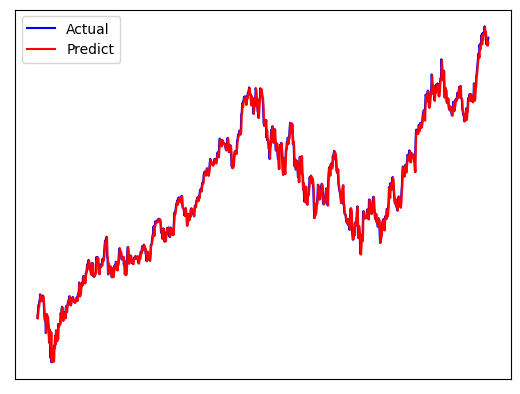

In [234]:
plt.plot(df_test.index[1:], y_test, color="blue", label = 'Actual')
plt.plot(df_test.index[1:], y_pred, color="red", label = 'Predict')
Signal=[1 if y_pred[i]>=y_test[i] else -1 for i in range(len(y_pred))]
plt.xticks(())
plt.yticks(())
plt.legend()
plt.show()

In [235]:
def command(y_pred_trend,y_true_price):
    command = []
    command_long = []
    command_short = []
    rate_by_time = []
    position = []
    rate_certain_time = []
    rate = 0
    pred=0
    pos=0
    count = 0
    for i in range(len(y_true_price)):
        if  y_pred_trend[i]==1:
                command.append(1)
                command_long.append(1)
                command_short.append(0)
                if pred !=1:
                    rate = rate + (y_true_price[i]-pos)*pred-0.15
                    pos =y_true_price[i]
                    count+=1
                pred=1
                position.append(pos)
                rate_by_time.append(rate)
        elif  y_pred_trend[i]==-1:
                command.append(-1)
                command_long.append(0)
                command_short.append(1)
                if pred !=-1:
                    rate = rate + (y_true_price[i]-pos)*pred-0.15
                    pos =y_true_price[i]
                    count+=1
                pred = -1
                position.append(pos)
                rate_by_time.append(rate)
        else:
            command.append(0)
            command_long.append(0)
            command_short.append(0)
            if pred != 0:
                rate = rate+ pred*(y_true_price[i]-pos) 
            pred = 0
            pos =0
            position.append(pos)
            rate_by_time.append(rate)
    return [y_true_price,command,command_long,command_short,rate_by_time,position], count      

In [243]:
t,fee= command(Signal,y_test)
t[0]=t[0].tolist()
t= pd.DataFrame(t).transpose()
t.columns=['Close','Command','L','S','Total_gain','Position']
t.index=df_test.index[:-1]
print(t,fee)


                 Close  Command    L    S  Total_gain    Position
Date                                                             
2020-01-30  164.040070      1.0  1.0  0.0   -0.150000  164.040070
2020-01-31  168.039200     -1.0  0.0  1.0    3.699130  168.039200
2020-02-03  173.570450     -1.0  0.0  1.0    3.699130  168.039200
2020-02-04  173.358475     -1.0  0.0  1.0    3.699130  168.039200
2020-02-05  176.952866     -1.0  0.0  1.0    3.699130  168.039200
...                ...      ...  ...  ...         ...         ...
2023-12-01  369.140015      1.0  1.0  0.0  238.998932  374.510010
2023-12-04  372.519989     -1.0  0.0  1.0  236.858911  372.519989
2023-12-05  368.799988      1.0  1.0  0.0  240.428912  368.799988
2023-12-06  370.950012     -1.0  0.0  1.0  242.428937  370.950012
2023-12-07  374.230011     -1.0  0.0  1.0  242.428937  370.950012

[972 rows x 6 columns] 498


In [244]:
def portfolio_pnl_future(position_long, position_short, Close):
    a=0
    fee=[0]
    for i in range(1,len(t.L)):
        if t.L[i-1]>t.L[i] or t.S[i-1]>t.S[i]:
            a=a+1
            fee.append(a*0.15)
        else:
            fee.append(a*0.15)
    intitial_capital_long = (position_long.iloc[0])*(Close.iloc[0])
    cash_long = (position_long.diff()*Close)
    cash_long[0] = intitial_capital_long
    cash_cs_long = cash_long.cumsum()
    portfolio_value_long = (position_long *Close)

    intitial_capital_short = (position_short.iloc[0])*(Close.iloc[0])
    cash_short = (position_short.diff()* Close)
    cash_short[0] = intitial_capital_short
    cash_cs_short = cash_short.cumsum()
    portfolio_value_short = (position_short* Close)

    backtest = (portfolio_value_long - cash_cs_long).iloc[1:] + (cash_cs_short - portfolio_value_short).iloc[1:]-fee[1:]
    cash_max = (cash_long + cash_short).max()
    pnl =  backtest/cash_max
    
    return backtest, cash_max, pnl
def Sharp(pnl):
    r = pnl.diff(1)
    return np.abs(r.mean())/r.std() * np.sqrt(252)

def maximum_drawdown_future(backtest, cash_max):
    return (backtest.cummax() - backtest).max(), (backtest.cummax() - backtest).max()/cash_max

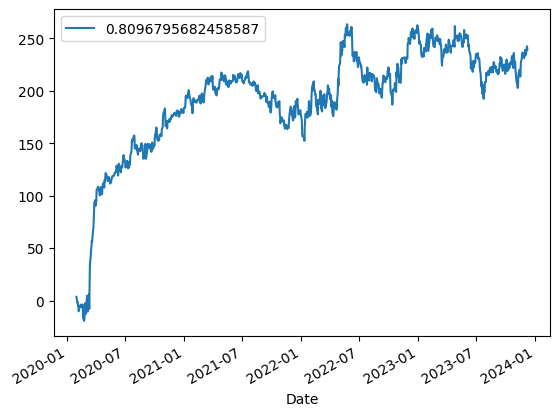

In [246]:
import numpy as np
backtest, cash_max,pnl= portfolio_pnl_future(t.L,t.S,t.Close)
backtest.index = pd.to_datetime(backtest.index)
pnl = portfolio_pnl_future(t.L, t.S, t.Close)[0]
pnl.index = pd.to_datetime(pnl.index)
pnl.index = pd.to_datetime(pnl.index)
pnl = pnl.resample('1D').last().dropna()
backtest.plot(label = Sharp(backtest.resample('1D').last().dropna()))
plt.legend()


# Ridge with cross valid

In [210]:
y = merged_df['Close_msft'].to_numpy()
X = merged_df[feature_col].to_numpy()

In [211]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(ridge, X, y, cv=K_fold)
for i in range(len(scores)):
    print("Cross validation fold {}: %2f".format(i+1) % scores[i])

Cross validation fold 1: 1.000000
Cross validation fold 2: 1.000000
Cross validation fold 3: 1.000000
Cross validation fold 4: 1.000000
Cross validation fold 5: 1.000000


# Automatic feature selection with Grid Search CV

In [212]:
from sklearn.feature_selection import RFE
from sklearn.model_selection import KFold, GridSearchCV
# step-1: create a cross-validation scheme

folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

# step-2: specify range of hyperparameters to tune
grid = {
    'n_features_to_select': list(range(1, len(feature_col)+1))
    }


# step-3: perform grid search
# 3.1 specify model
lm = Ridge(alpha=lamda)
lm.fit(X_train, y_train)
rfe = RFE(lm)             

# 3.2 call GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = grid, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)   

Fitting 5 folds for each of 3 candidates, totalling 15 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=RFE(estimator=Ridge(alpha=0.5)),
             param_grid={'n_features_to_select': [1, 2, 3]},
             return_train_score=True, scoring='r2', verbose=1)

In [213]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.002624,0.000526,0.000299,0.000575,1,{'n_features_to_select': 1},0.999605,0.999432,0.999419,0.999433,...,0.999501,0.000090,3,0.999476,0.999520,0.999523,0.999521,0.999476,0.999503,0.000022
1,0.001378,0.000430,0.000619,0.000508,2,{'n_features_to_select': 2},0.999610,0.999465,0.999441,0.999461,...,0.999522,0.000082,1,0.999502,0.999539,0.999545,0.999541,0.999498,0.999525,0.000021
2,0.000660,0.000560,0.000614,0.000502,3,{'n_features_to_select': 3},0.999611,0.999467,0.999436,0.999463,...,0.999522,0.000083,2,0.999502,0.999539,0.999547,0.999542,0.999499,0.999526,0.000021


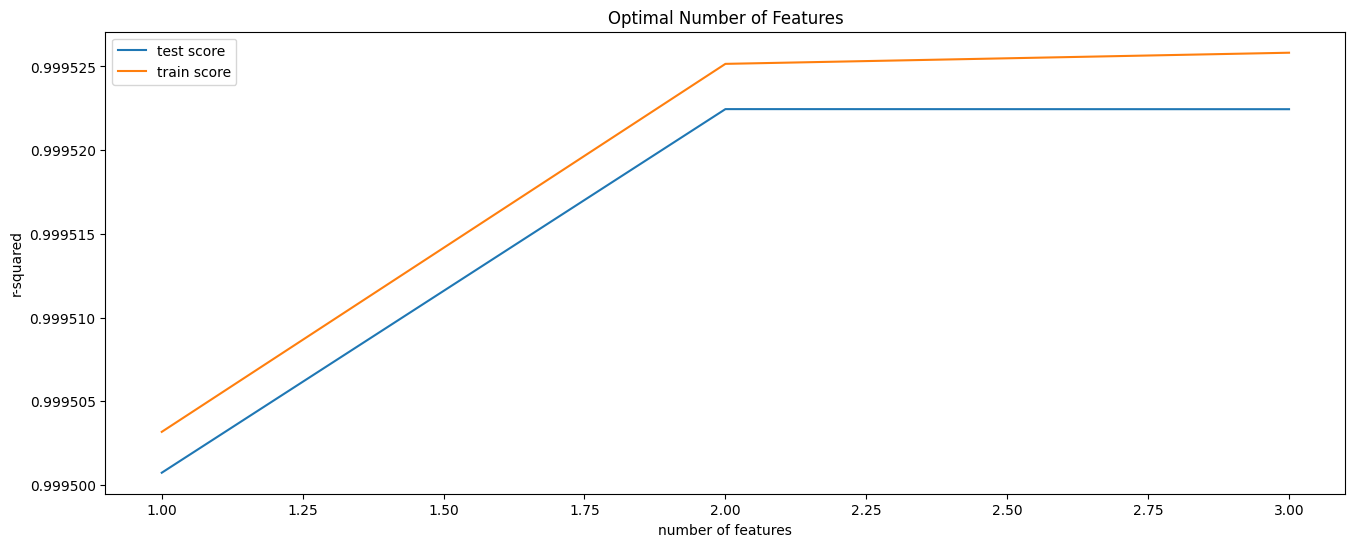

In [214]:
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

From the figure above, we can choose optimal number of feature used to train

In [215]:
model_cv.best_params_

{'n_features_to_select': 2}

In [216]:
n_features_optimal = 3

lm = Ridge(0.5)
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=n_features_optimal)             
rfe = rfe.fit(X_train, y_train)

# predict prices of X_test
y_pred = lm.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(r2)

0.9916877823939461
